# Chapter 2: Hash Maps and Sets

## Pair Sum - Unsorted - Easy

Given an array of integers, return the indexes of any two numbers that add up to a target. The order of the indexes in the result doesn't matter. If no pair is found, return an empty array.

Example:
Input: nums = [-1, 3, 4, 2], target = 3
Output: [0, 2]
Explanation: nums[0] + nums[2] = -1 + 4 = 3

Constraints:
The same index cannot be used twice in the result.

In [24]:
from typing import List


def pair_sum_unsorted(nums: List[int], target: int) -> List[int]:
    # initialize
    seen_numbers = {}  # holds num as key, index as value

    for idx, num in enumerate(nums):
        # compute the complement(other number)
        complement = target - num  # 3 - (4) = -1
        # check if we have the complement in the seen numbers
        if complement in seen_numbers:
            return [seen_numbers[complement], idx]
        else:
            seen_numbers[num] = idx
    return []


nums = [-1, 3, 4, 2]
target = 3

pair_sum_unsorted(nums=nums, target=target)

[0, 2]

In [7]:
test_dict = {"a": 2, "b": 3}

"a" in test_dict.keys()

True

## Verify Sudoku Board - Medium


Given a partially completed 9×9 Sudoku board, determine if the current state of the board adheres to the rules of the game:

Each row and column must contain unique numbers between 1 and 9, or be empty (represented as 0).

Each of the nine 3×3 subgrids that compose the grid must contain unique numbers between 1 and 9, or be empty.

Note: You are asked to determine whether the current state of the board is valid given these rules, not whether the board is solvable.

Example:
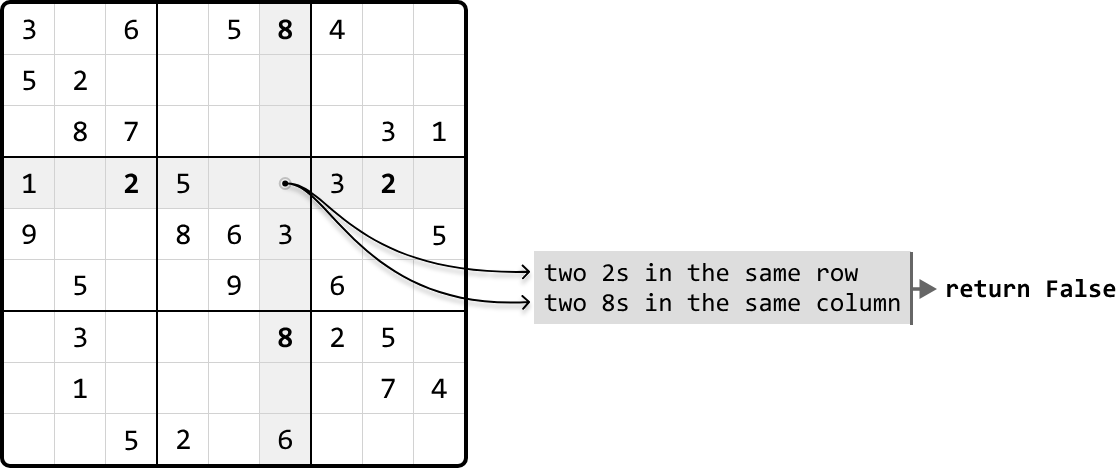

Example
Output: False
Constraints:
Assume each integer on the board falls in the range of [0, 9].

## Zero Striping - Medium


## Longest Chain of Consecutive Numbers - Medium


## Geometric Sequence Triplets - Medium
